In [1]:
import pyhawkes

In [59]:
K = 3
p = 0.25
dt_max = 20
network_hypers = {"p": p, "allow_self_connections": False}
true_model = DiscreteTimeNetworkHawkesModelSpikeAndSlab(
    K=K, dt_max=dt_max, network_hypers=network_hypers)
true_model.

True

/Users/adampah/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/pyhawkes/internals/parents.py:76: UserWarning: Failed to import gslrandom for parallel multinomial sampling. Defaulting to pure python instead. This will have a significant impact on performance. To install gslrandom, see https://github.com/slinderman/gslrandom
  warn("Failed to import gslrandom for parallel multinomial sampling. "
/Users/adampah/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'lw'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(<Figure size 432x288 with 4 Axes>,
 ([<matplotlib.patches.FancyArrow at 0x1163e3b70>,
  [[<matplotlib.lines.Line2D at 0x11647b208>],
   [<matplotlib.lines.Line2D at 0x1164293c8>]]))

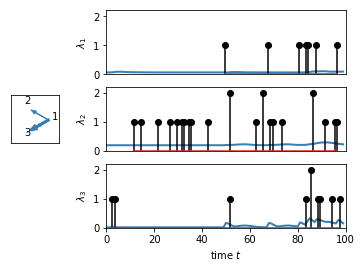

In [2]:
%matplotlib inline

from pyhawkes.models import DiscreteTimeNetworkHawkesModelSpikeAndSlab
# Create a simple random network with K nodes a sparsity level of p
# Each event induces impulse responses of length dt_max on connected nodes
K = 3
p = 0.25
dt_max = 20
network_hypers = {"p": p, "allow_self_connections": False}
true_model = DiscreteTimeNetworkHawkesModelSpikeAndSlab(
    K=K, dt_max=dt_max, network_hypers=network_hypers)

# Generate T time bins of events from the the model
# S is the TxK event count matrix, R is the TxK rate matrix
S,R = true_model.generate(T=100)
true_model.plot()

/Users/adampah/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/pyhawkes/internals/parents.py:76: UserWarning: Failed to import gslrandom for parallel multinomial sampling. Defaulting to pure python instead. This will have a significant impact on performance. To install gslrandom, see https://github.com/slinderman/gslrandom
  warn("Failed to import gslrandom for parallel multinomial sampling. "
/Users/adampah/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'lw'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(<Figure size 432x288 with 4 Axes>,
 ([<matplotlib.patches.FancyArrow at 0x11737ae80>,
  [[<matplotlib.lines.Line2D at 0x117401518>],
   [<matplotlib.lines.Line2D at 0x1173b96d8>]]))

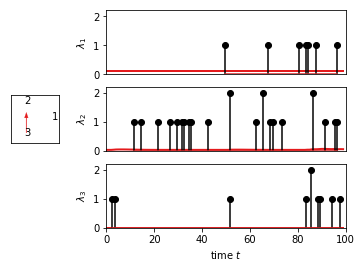

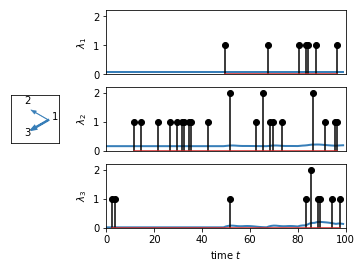

In [3]:
# Create the test model, add the event count data, and plot
test_model = DiscreteTimeNetworkHawkesModelSpikeAndSlab(
    K=K, dt_max=dt_max, network_hypers=network_hypers)
test_model.add_data(S)
fig, handles = test_model.plot(color="#e41a1c")

# Run a Gibbs sampler
N_samples = 100
lps = []
for itr in range(N_samples):
    test_model.resample_model()
    lps.append(test_model.log_probability())

# Update plots
test_model.plot()

In [64]:
test_model.get_parameters()

(array([[False, False, False],
        [False, False, False],
        [False, False, False]]), array([[0.91846974, 0.61039584, 0.53575147],
        [0.47363505, 0.1965066 , 0.55231184],
        [0.52232904, 0.0362866 , 0.18132911]]), array([[[0.0936904 , 0.61461184, 0.10528721, 0.07398329, 0.11242726],
         [0.35454653, 0.29117511, 0.01904859, 0.22872485, 0.10650492],
         [0.14985306, 0.24546315, 0.39771328, 0.1515969 , 0.05537361]],
 
        [[0.00167002, 0.47037203, 0.40846338, 0.04608126, 0.0734133 ],
         [0.55636918, 0.10308756, 0.26147066, 0.01886567, 0.06020693],
         [0.29669757, 0.17048083, 0.09601518, 0.15122267, 0.28558375]],
 
        [[0.18363926, 0.22067155, 0.07908411, 0.28301461, 0.23359048],
         [0.16359155, 0.44343825, 0.0934553 , 0.05920271, 0.24031219],
         [0.37444659, 0.35171578, 0.19375887, 0.03018272, 0.04989604]]]), array([0.57223293, 1.44137432, 2.97858925]), 0.25, 1.5)

In [8]:
import numpy as np
np.array(list(zip([0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11])))

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

In [69]:
np.array(list(zip([[0, 1.0, 2, 3, 4], [4, 5, 6, 7, 8], [8, 9, 10, 11, 12]]))).shape

(3, 1, 5)

In [70]:
from pyhawkes.models import DiscreteTimeStandardHawkesModel

# Create the test model, add the event count data, and plot
test_model = DiscreteTimeNetworkHawkesModelSpikeAndSlab(
    K=K, dt_max=dt_max, network_hypers=network_hypers)
test_model.add_data( np.array(list(zip([0, 1.0, 2, 3, 4], [4, 5, 6, 7, 8], [8, 9, 10, 11, 12]))) )
fig, handles = test_model.plot(color="#e41a1c")

# Run a Gibbs sampler
N_samples = 100
lps = []
for itr in range(N_samples):
    test_model.resample_model()
    lps.append(test_model.log_probability())

# Update plots
test_model.plot()

AssertionError: Data must be a TxK array of event counts

In [10]:
print('party')

party


In [87]:
test_model.W_effective

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [30]:
true_model.W_effective

array([[0.        , 0.2618995 , 0.85130507],
       [0.        , 0.        , 0.        ],
       [0.07953993, 0.        , 0.        ]])

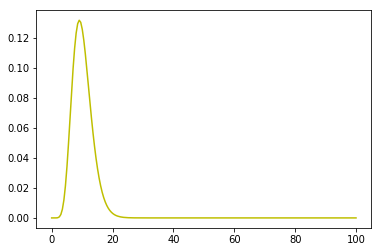

In [49]:
import numpy as np
import scipy.stats as stats 
from matplotlib import pyplot as plt

x = np.linspace (0, 100, 200) 
y1 = stats.gamma.pdf(x, a=10, loc=1/10) #a is alpha, loc is beta???
plt.plot(x, y1, "y-", label=(r'$\alpha=29, \beta=3$')) 


plt.autoscale()
plt.show()

In [50]:
import sys
sys.path.append('..')
import support.loaders as loaders

In [51]:
df = loaders.load_country_data('../../data/Afghanistan_events.csv')

/Users/adampah/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [54]:
df.date

2419   2001-01-07
2431   2001-01-22
2436   2001-02-01
2437   2001-02-01
2438   2001-02-01
2446   2001-02-10
2458   2001-03-15
2460   2001-03-17
2472   2001-05-04
2529   2001-08-17
2570   2001-09-02
2574   2001-09-10
2583   2001-09-26
2635   2001-12-26
2636   2002-01-01
2653   2002-01-17
2696   2002-04-08
2701   2002-04-12
2702   2002-04-13
2703   2002-04-13
2706   2002-04-19
2717   2002-05-02
2721   2002-05-06
2723   2002-05-08
2730   2002-05-13
2731   2002-05-13
2745   2002-05-31
2757   2002-06-27
2761   2002-07-06
2770   2002-08-01
          ...    
4290   2005-10-29
4291   2005-10-29
4297   2005-11-07
4303   2005-11-11
4306   2005-11-12
4305   2005-11-12
4308   2005-11-13
4309   2005-11-14
4310   2005-11-14
4311   2005-11-16
4316   2005-11-19
4317   2005-11-19
4318   2005-11-21
4319   2005-11-21
4326   2005-12-02
4327   2005-12-02
4329   2005-12-06
4338   2005-12-09
4339   2005-12-09
4340   2005-12-09
4344   2005-12-14
4347   2005-12-14
4349   2005-12-15
4350   2005-12-17
4354   200

In [57]:
import pandas as pd
pd.date_range('2001-01-01', '2005-12-31')

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2005-12-22', '2005-12-23', '2005-12-24', '2005-12-25',
               '2005-12-26', '2005-12-27', '2005-12-28', '2005-12-29',
               '2005-12-30', '2005-12-31'],
              dtype='datetime64[ns]', length=1826, freq='D')